### Scraping MLB stats from ESPN go###

In this homework we will try to analyze the batting performances of different teams in Major League Baseball using the data available in the following link http://espn.go.com/mlb/stats/team/_/stat/batting 

We will first scrape the page corresponding to the 2015 season 

In [1]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"

We will now scrape the table found in the above link. You can follow the class notebook to understand how to capture html table tags.

Q1) Write a function which will take the above url and return a pandas dataframe corresponding to the table found in the given link. 
-Note from Sachin: only keep the information from the teams

In [ ]:
#import pandas
#pandas.read_csv("http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015")

In [2]:
import requests
import lxml.html as lh
page = requests.get(url)
doc = lh.fromstring(page.content)
page.content[:500]

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml">\n<head><script src="http://sports-ak.espn.go.com/sports/optimizely.js"></script><meta charset="iso-8859-1">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<link rel="icon" sizes="any" mask href="http://a.espncdn.com/prod/assets/icons/E.svg">\n<meta name="theme-color" content="#CC0000">\n<script type="text/javascript">    \n    if(true && navigator && navigator.userAgent.toLowerCase().indexOf("teamstream") >= 0) {\n   '

In [3]:
#tr_elements stands for table row

tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:20]]

[1, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

In [4]:
for i in range(len(tr_elements)):
    if len(tr_elements[i])==15:
        print i, tr_elements[i].text_content()

1 RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
2 1Toronto16255098911480308172322518852.269.340.457.797
3 2NY Yankees16255677641397272192122343737.251.323.421.744
4 3Texas16255117511419279321722278707.257.325.413.739
5 4Boston16256407481496294331612339706.265.325.415.740
6 5Colorado16255727371479274491862409702.265.315.432.748
7 6Houston16254597291363278262302383691.250.315.437.752
8 7Kansas City16255757241497300421392298689.269.322.412.734
9 8Arizona16256497201494289481542341680.264.324.414.738
10 9Baltimore16254857131370246202172307686.250.307.421.728
11 10Washington16254287031363265131772185665.251.321.403.724
12 11Pittsburgh16256316971462292271402228661.260.323.396.719
13 12Minnesota16254676961349277441562182661.247.305.399.704
14 13San Francisco16255656961486288391362260663.267.326.406.732
15 14Oakland16256006941405277461462212661.251.312.395.707
16 15Detroit16156056891515289491512355660.270.328.420.748
17 16Chicago Cubs16254916891341272301712186657.244.321.398.719
18 17NY Mets1625527683135

In [26]:
col=[]  # collect column names into col
T=tr_elements[1]
print T.text_content()
i=0
print len(T)
for t in T.iterchildren():
    i+=1
    name=t.text_content()
    print '%d:"%s"'%(i,name)
    col.append((name,[]))
print col

RKTEAMGPABRH2B3BHRTBRBIAVGOBPSLGOPS
15
1:"RK"
2:"TEAM"
3:"GP"
4:"AB"
5:"R"
6:"H"
7:"2B"
8:"3B"
9:"HR"
10:"TB"
11:"RBI"
12:"AVG"
13:"OBP"
14:"SLG"
15:"OPS"
[('RK', []), ('TEAM', []), ('GP', []), ('AB', []), ('R', []), ('H', []), ('2B', []), ('3B', []), ('HR', []), ('TB', []), ('RBI', []), ('AVG', []), ('OBP', []), ('SLG', []), ('OPS', [])]


In [27]:
for j in range(7,len(tr_elements)):
    T=tr_elements[j]
    if len(T)!=15:
        break
    i=0
    for t in T.iterchildren():
        data=t.text_content()
        if i!=1:
            try:
                data=float(data)
            except:
                print data,'cannot be converted to float, row,col=',j,i
                data=None
        col[i][1].append(data)
        i+=1

Dict={title:column for (title,column) in col}
import pandas as pd
df=pd.DataFrame(Dict)
df.head()


,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,278,26,5459,0.250,162,1363,230,0.315,0.752,729,691,6,0.437,2383,Houston
1,300,42,5575,0.269,162,1497,139,0.322,0.734,724,689,7,0.412,2298,Kansas City
2,289,48,5649,0.264,162,1494,154,0.324,0.738,720,680,8,0.414,2341,Arizona
3,246,20,5485,0.250,162,1370,217,0.307,0.728,713,686,9,0.421,2307,Baltimore
4,265,13,5428,0.251,162,1363,177,0.321,0.724,703,665,10,0.403,2185,Washington


In [109]:
def SCRAPE_ESPN_MLB_STATS(url):
    page = requests.get(url)
    doc = lh.fromstring(page.content)
    tr_elements = doc.xpath('//tr')

    col=[]  # collect column names into col
    T=tr_elements[1]
    #print T.text_content()
    i=0
    #print len(T)
    for t in T.iterchildren():
        i+=1
        name=t.text_content()
        #print '%d:"%s"'%(i,name)
        col.append((name,[]))
    #print col
    
    
    for j in range(7,len(tr_elements)):
        T=tr_elements[j]
        if len(T)!=15:
            break
        i=0
        for t in T.iterchildren():
            data=t.text_content()
            if i!=1:
                try:
                    data=float(data)
                except:
                    print data,'cannot be converted to float, row,col=',j,i
                    data=None
            col[i][1].append(data)
            i+=1

    Dict={title:column for (title,column) in col}
    import pandas as pd
    df=pd.DataFrame(Dict)
    return df



SCRAPE_ESPN_MLB_STATS("http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015")

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,278,26,5459,0.250,162,1363,230,0.315,0.752,729,691,6,0.437,2383,Houston
1,300,42,5575,0.269,162,1497,139,0.322,0.734,724,689,7,0.412,2298,Kansas City
2,289,48,5649,0.264,162,1494,154,0.324,0.738,720,680,8,0.414,2341,Arizona
3,246,20,5485,0.250,162,1370,217,0.307,0.728,713,686,9,0.421,2307,Baltimore
4,265,13,5428,0.251,162,1363,177,0.321,0.724,703,665,10,0.403,2185,Washington
5,292,27,5631,0.260,162,1462,140,0.323,0.719,697,661,11,0.396,2228,Pittsburgh
6,277,44,5467,0.247,162,1349,156,0.305,0.704,696,661,12,0.399,2182,Minnesota
7,288,39,5565,0.267,162,1486,136,0.326,0.732,696,663,13,0.406,2260,San Francisco
8,277,46,5600,0.251,162,1405,146,0.312,0.707,694,661,14,0.395,2212,Oakland
9,289,49,5605,0.270,161,1515,151,0.328,0.748,689,660,15,0.420,2355,Detroit


Run the above function to scrape season 2015 stats.

In [110]:
url="http://espn.go.com/mlb/stats/team/_/stat/batting/year/2015"
df_2015 = SCRAPE_ESPN_MLB_STATS(url)
df_2015

,2B,3B,AB,AVG,GP,H,HR,OBP,OPS,R,RBI,RK,SLG,TB,TEAM
0,278,26,5459,0.250,162,1363,230,0.315,0.752,729,691,6,0.437,2383,Houston
1,300,42,5575,0.269,162,1497,139,0.322,0.734,724,689,7,0.412,2298,Kansas City
2,289,48,5649,0.264,162,1494,154,0.324,0.738,720,680,8,0.414,2341,Arizona
3,246,20,5485,0.250,162,1370,217,0.307,0.728,713,686,9,0.421,2307,Baltimore
4,265,13,5428,0.251,162,1363,177,0.321,0.724,703,665,10,0.403,2185,Washington
5,292,27,5631,0.260,162,1462,140,0.323,0.719,697,661,11,0.396,2228,Pittsburgh
6,277,44,5467,0.247,162,1349,156,0.305,0.704,696,661,12,0.399,2182,Minnesota
7,288,39,5565,0.267,162,1486,136,0.326,0.732,696,663,13,0.406,2260,San Francisco
8,277,46,5600,0.251,162,1405,146,0.312,0.707,694,661,14,0.395,2212,Oakland
9,289,49,5605,0.270,161,1515,151,0.328,0.748,689,660,15,0.420,2355,Detroit


We will now produce plots analyzing performance of different teams on different statistical parameters

Q2) Write a function which will take the above dataframe and a list of column names as input and produces a set of plots corresponding to each of the column names provided

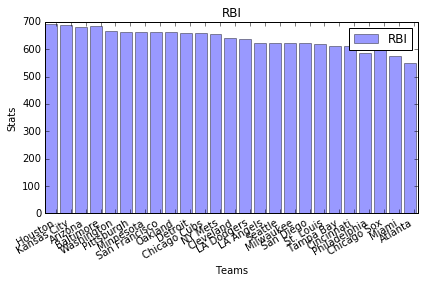

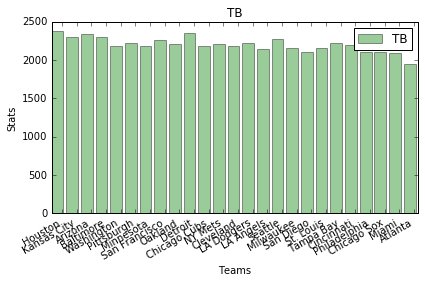

In [108]:
def produce_plots(df, col_names):
    x=0
    colors = "bgrcmykw"   
    for i in col_names:
        n_groups = len(df.TEAM)
        means_men = df[i]
        fig, ax = plt.subplots()
        index = np.arange(n_groups)
        bar_width = 0.7
        opacity = 0.4
        error_config = {'ecolor': '0.3'}
        rects1 = plt.bar(index, means_men,
                         alpha=opacity,
                         color=colors[x],      
                         error_kw=error_config,
                         label='%s'%i)
        x=x+1
        fig.autofmt_xdate()
        plt.xlabel('Teams')
        plt.ylabel('Stats')
        plt.title('%s'%i)
        plt.xticks(index + bar_width, (df.TEAM))
        plt.legend()
        plt.tight_layout()
        plt.show()
produce_plots(df_2015, ["RBI", "TB"]) 

Call the above function for the columns

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

Q3) We will now use the above functions to scrape for more seasons and analyze the performances over a period of 6 years from 2010-2015

In [111]:
dfs={}
for year in xrange(0,6):
    link = 'http://espn.go.com/mlb/stats/team/_/stat/batting/year/201'+str(year)
    dfs[year]=SCRAPE_ESPN_MLB_STATS(link)

In [213]:
for i in dfs.keys():
    dfs[i]["Year"]="201%i"%i
    print dfs[i]

     2B  3B    AB    AVG   GP     H   HR    OBP    OPS    R  RBI  RK    SLG  \
0   318  41  5568  0.273  162  1521  142  0.341  0.762  781  749   6  0.422   
1   290  34  5581  0.260  162  1451  166  0.332  0.745  772  736   7  0.413   
2   270  54  5530  0.263  162  1452  173  0.336  0.760  770  741   8  0.425   
3   319  21  5495  0.248  162  1364  257  0.312  0.766  755  732   9  0.454   
4   263  21  5484  0.268  162  1467  177  0.332  0.752  752  710  10  0.420   
5   308  32  5643  0.268  162  1515  152  0.335  0.750  751  717  11  0.415   
6   293  33  5606  0.262  162  1471  182  0.335  0.759  750  710  12  0.424   
7   312  25  5463  0.258  162  1411  139  0.339  0.740  738  699  13  0.401   
8   285  18  5542  0.263  162  1456  150  0.332  0.733  736  689  14  0.402   
9   294  37  5531  0.254  162  1403  152  0.321  0.724  719  686  15  0.403   
10  301  34  5473  0.250  162  1366  180  0.325  0.740  713  691  16  0.416   
11  284  30  5488  0.257  162  1411  162  0.321  0.7

Inorder to analyze performance of teams across seasons, we will need all the data in a single dataframe. 

Q4) Use appropriate pandas functions to combine the above dictionary of year:dataframe to produce one dataframe which has a new column corresponding to the year/season 

In [208]:
frames = [dfs[i] for i in dfs.keys()]
combined_df = pd.concat(frames, ignore_index=True)
print combined_df
#combined_df = #combine dfs dictionary with a new column for year

      2B  3B    AB    AVG   GP     H   HR    OBP    OPS    R  RBI  RK    SLG  \
0    318  41  5568  0.273  162  1521  142  0.341  0.762  781  749   6  0.422   
1    290  34  5581  0.260  162  1451  166  0.332  0.745  772  736   7  0.413   
2    270  54  5530  0.263  162  1452  173  0.336  0.760  770  741   8  0.425   
3    319  21  5495  0.248  162  1364  257  0.312  0.766  755  732   9  0.454   
4    263  21  5484  0.268  162  1467  177  0.332  0.752  752  710  10  0.420   
5    308  32  5643  0.268  162  1515  152  0.335  0.750  751  717  11  0.415   
6    293  33  5606  0.262  162  1471  182  0.335  0.759  750  710  12  0.424   
7    312  25  5463  0.258  162  1411  139  0.339  0.740  738  699  13  0.401   
8    285  18  5542  0.263  162  1456  150  0.332  0.733  736  689  14  0.402   
9    294  37  5531  0.254  162  1403  152  0.321  0.724  719  686  15  0.403   
10   301  34  5473  0.250  162  1366  180  0.325  0.740  713  691  16  0.416   
11   284  30  5488  0.257  162  1411  16

Q5) Now write a function which will take the above dataframe and a list of column names and produces a set of plots corresponding to each of the columns provided. Each plot is a set of subplots, where every subplot is a line graph of the column values over the 6 years for each of the teams in the dataframe.

In [222]:
print(combined_df.loc[combined_df['TEAM'].isin(['San Francisco'])])
ListTeams=dfs[0].TEAM.values.tolist()
for i in ListTeams:
    print i

      2B  3B    AB    AVG   GP     H   HR    OBP    OPS    R  RBI  RK    SLG  \
11   284  30  5488  0.257  162  1411  162  0.321  0.729  697  660  17  0.408   
48   282  24  5486  0.242  162  1327  121  0.303  0.671  570  534  29  0.368   
56   287  57  5558  0.269  162  1495  103  0.327  0.724  718  675  12  0.397   
90   280  35  5552  0.260  162  1446  107  0.320  0.702  629  596  21  0.381   
106  257  42  5523  0.255  162  1407  132  0.311  0.699  665  636  12  0.388   
132  288  39  5565  0.267  162  1486  136  0.326  0.732  696  663  13  0.406   

       TB           TEAM  Year  
11   2241  San Francisco  2010  
48   2020  San Francisco  2011  
56   2205  San Francisco  2012  
90   2117  San Francisco  2013  
106  2144  San Francisco  2014  
132  2260  San Francisco  2015  
Minnesota
Philadelphia
Colorado
Toronto
Chicago Sox
Detroit
Milwaukee
Atlanta
St. Louis
Florida
Arizona
San Francisco
Chicago Cubs
LA Angels
Kansas City
LA Dodgers
San Diego
Oakland
NY Mets
Washington
Clevela

In [314]:
def produce_plots_over_seasons(combined_df, col_names):  
    #col_names = ['HR','TB','RBI']
    c=0
    for z in col_names:
        colors = "bgrcmykw" 
        for i in ListTeams:    
            x= combined_df.loc[combined_df['TEAM'].isin([i])].Year
            y= combined_df.loc[combined_df['TEAM'].isin([i])][z]
            plt.figure(1)
            plt.subplot(211)
            plt.plot(x,y,color=colors[c],linewidth=2.0);plt.xlabel('Year');plt.ylabel('Stats');plt.title('%s for %s '% (z,i));plt.legend();#plt.xticks(index, x)
            plt.show()
        c=c+1

Call the above function for the columns 

1. HR: Home Runs
2. TB: Total Bases
3. RBI: Runs Batted In

In [ ]:
Sachin:  Here I did not know if you wanted each statisitc would only have one DF with each team on top of each other
    or each one broken out as shown, this would be a simple fix either way by just.

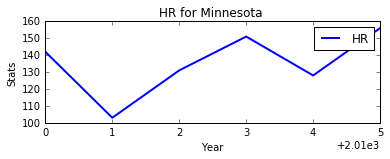

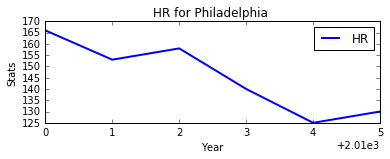

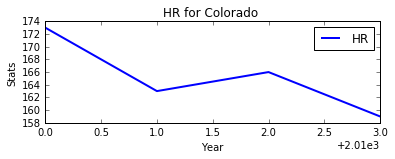

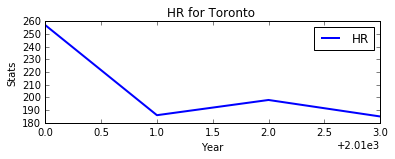

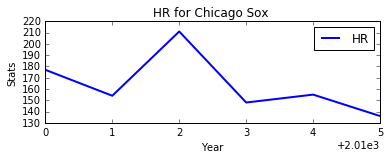

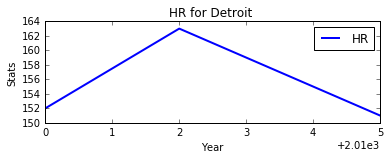

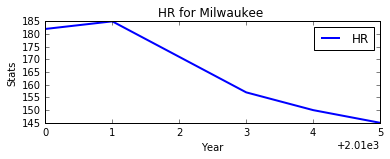

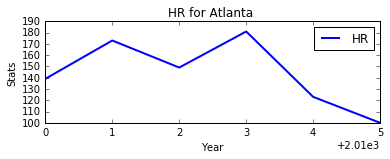

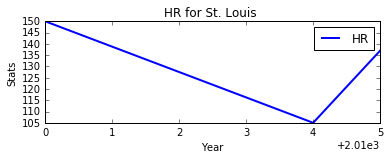

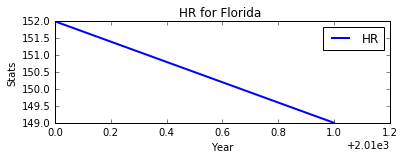

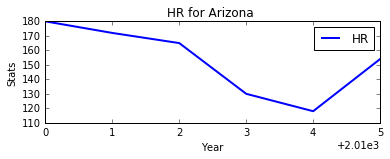

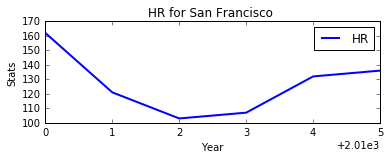

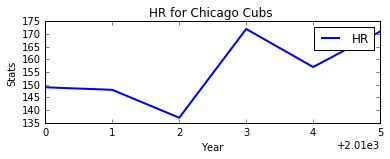

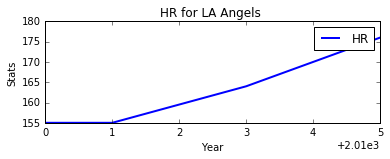

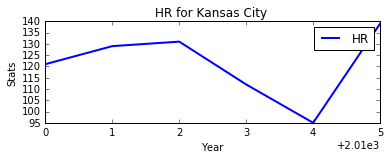

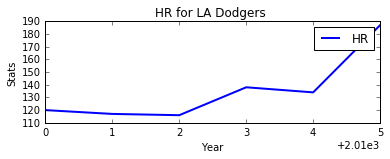

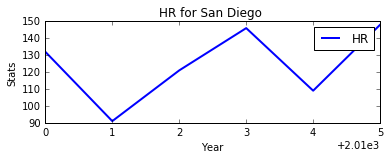

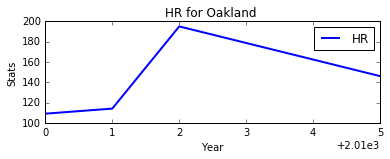

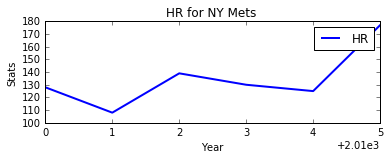

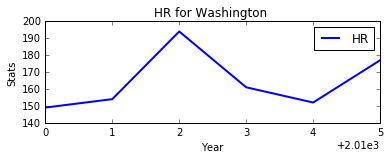

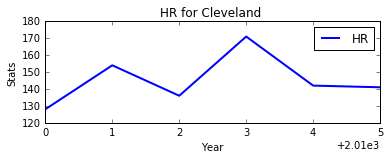

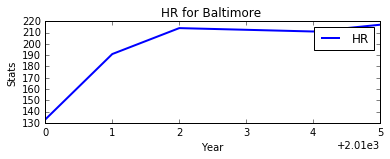

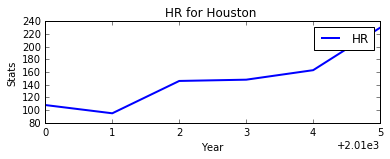

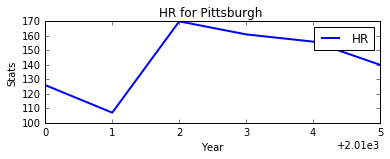

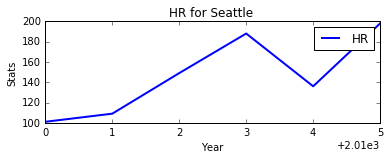

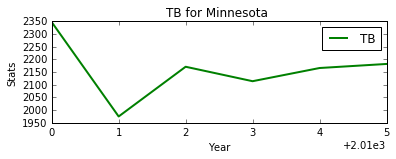

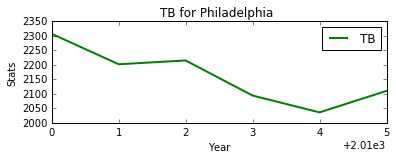

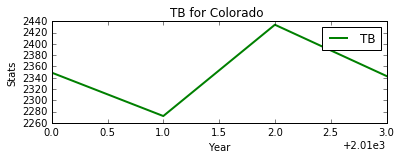

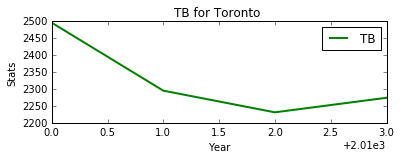

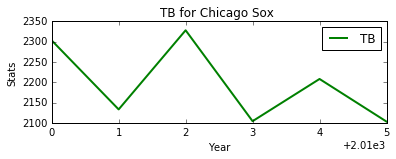

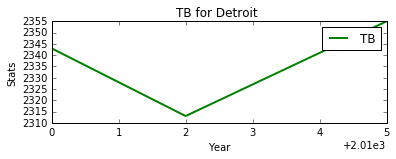

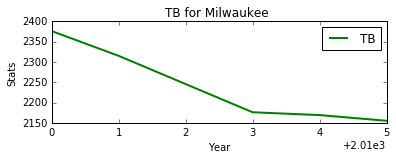

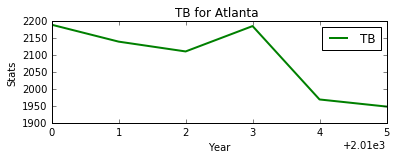

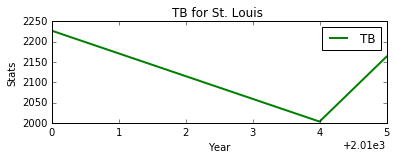

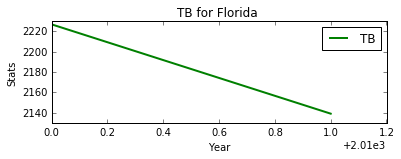

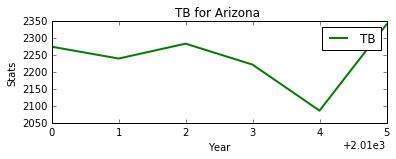

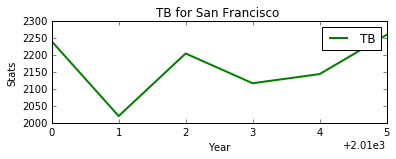

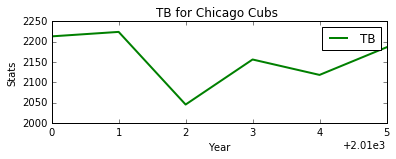

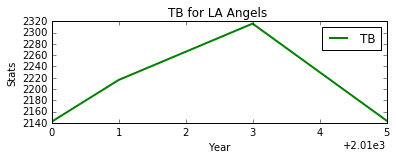

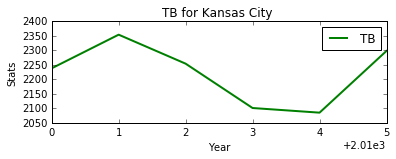

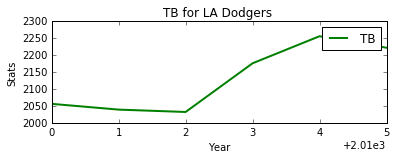

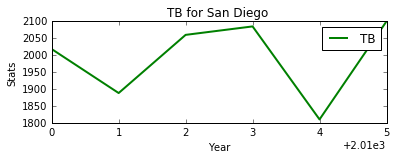

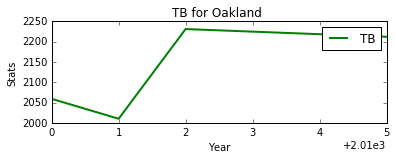

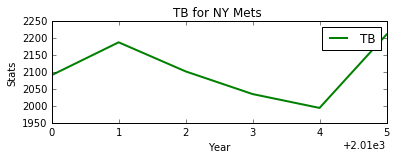

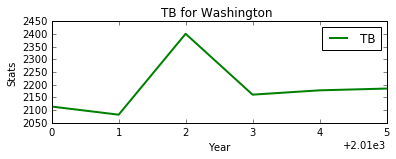

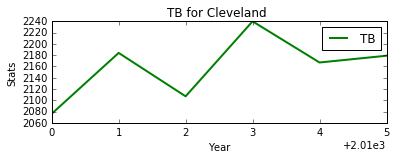

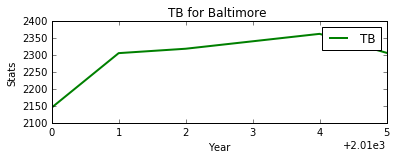

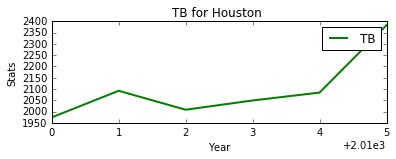

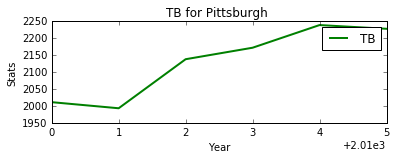

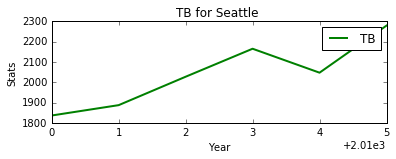

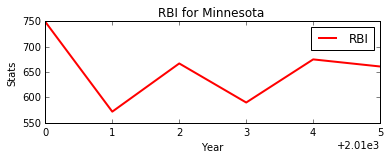

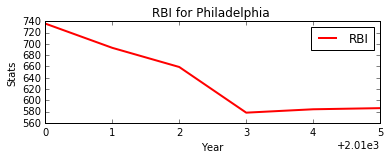

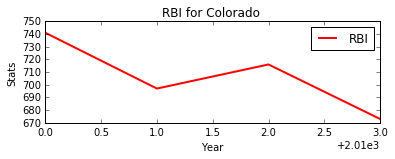

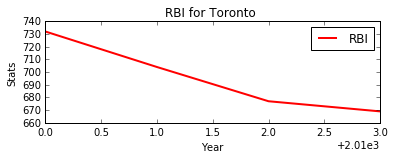

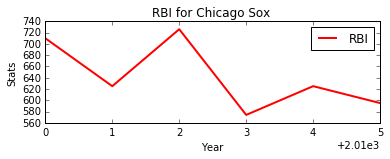

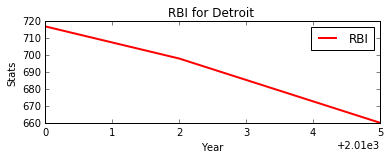

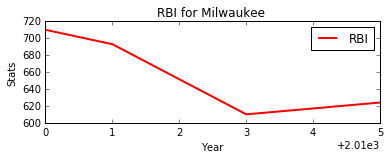

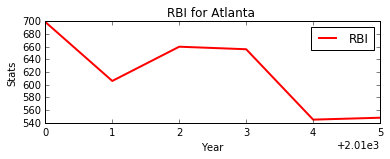

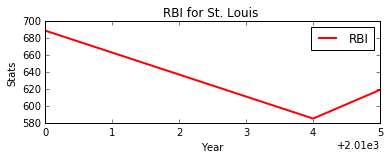

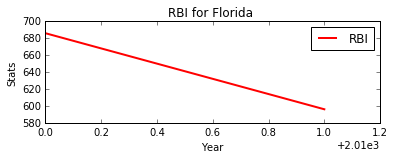

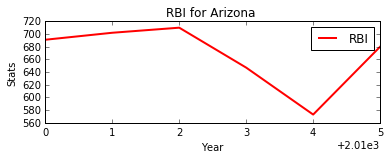

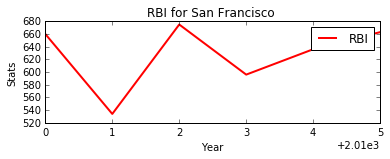

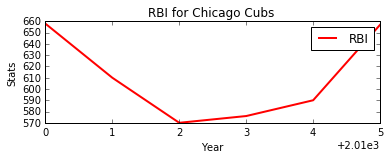

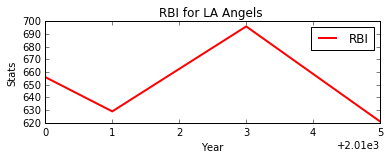

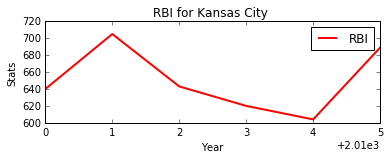

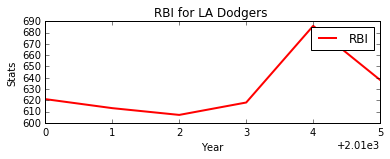

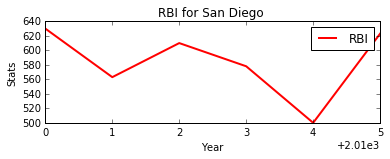

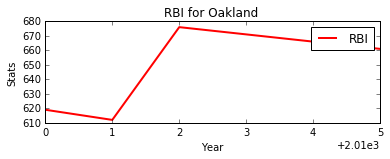

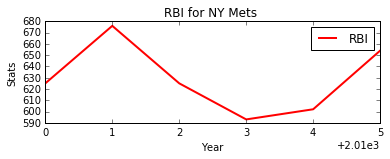

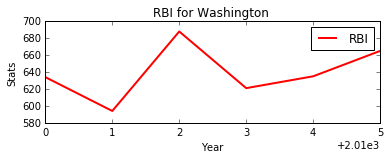

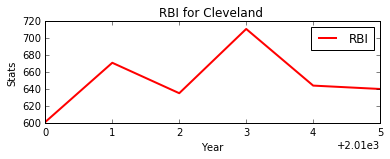

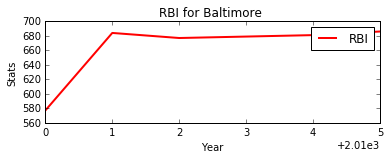

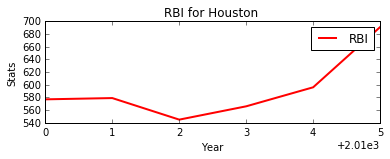

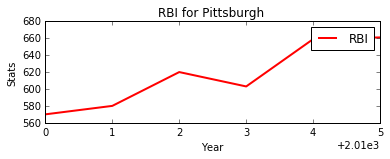

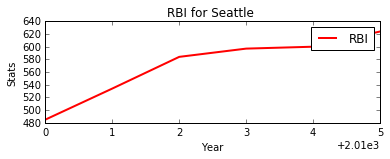

In [315]:
produce_plots_over_seasons(combined_df, ['HR','TB','RBI'])